In [2]:
pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [4]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(224,224))


Found 101965 images belonging to 2 classes.


In [5]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(224,224))


Found 20076 images belonging to 2 classes.


In [6]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (224,224))
        img = img / 255.0
        return img

In [7]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [8]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='tanh'))

In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 24,900,482
Trainable params: 1,312,770
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
resnet_model.compile(optimizer=Adam(lr=3e-4),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(trainingdt, validation_data=testingdt, epochs=10, steps_per_epoch=100, validation_steps=10)

Epoch 1/10
100/100 [==============================] - 378s 4s/step - loss: 0.7000 - accuracy: 0.5159 - val_loss: 0.6962 - val_accuracy: 0.5594
Epoch 2/10
100/100 [==============================] - 403s 4s/step - loss: 0.6947 - accuracy: 0.5044 - val_loss: 0.6937 - val_accuracy: 0.4656
Epoch 3/10
100/100 [==============================] - 345s 3s/step - loss: 0.6934 - accuracy: 0.4800 - val_loss: 0.6932 - val_accuracy: 0.4812
Epoch 4/10
100/100 [==============================] - 343s 3s/step - loss: 0.6934 - accuracy: 0.4916 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
100/100 [==============================] - 342s 3s/step - loss: 0.6933 - accuracy: 0.4936 - val_loss: 0.6932 - val_accuracy: 0.5406
Epoch 6/10
100/100 [==============================] - 342s 3s/step - loss: 0.6932 - accuracy: 0.5106 - val_loss: 0.6932 - val_accuracy: 0.5031
Epoch 7/10
100/100 [==============================] - 344s 3s/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6932 - val_accuracy: 0.4969

In [12]:
resnet_model.save('resnet50SVMtanh.h5')

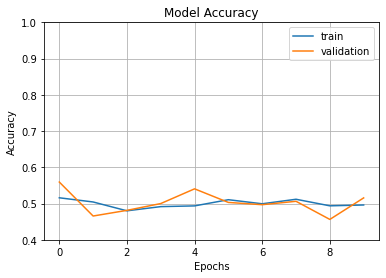

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

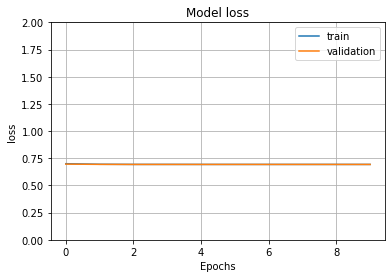

In [14]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0,ymax=2)
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [10]:
y_actual= testingdt.labels
pred= resnet_model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
from sklearn.metrics import classification_report
print(classification_report(pred, y_actual, target_names=['fake(class0)', 'real(class1)']))

ModuleNotFoundError: No module named 'sklearn'

In [11]:
pip install sklearn

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scikit_learn-1.1.1-cp39-cp39-win_amd64.whl (7.4 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=f268925df699140cfeaf55fc037187588d8c0ced2f64c788f101e32665e8c4fc
  Stored in directory: c:\users\viola\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [12]:
y_actual= testingdt.labels
pred= resnet_model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
from sklearn.metrics import classification_report
print(classification_report(pred, y_actual, target_names=['fake(class0)', 'real(class1)']))

              precision    recall  f1-score   support

fake(class0)       0.77      0.50      0.61     15360
real(class1)       0.24      0.50      0.32      4716

    accuracy                           0.50     20076
   macro avg       0.50      0.50      0.46     20076
weighted avg       0.64      0.50      0.54     20076



[[7701 2329]
 [7659 2387]]


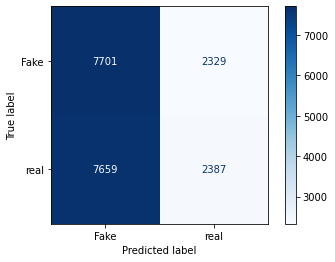

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
y_actual= testingdt.labels
pred= resnet_model.predict(testingdt, batch_size=32)
pred= np.argmax(pred, axis=-1)
cm=confusion_matrix(y_actual,pred)
print(cm)
labels = ["Fake", "real"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()